##from: https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [9]:
import numpy as np
import theano
import keras

In [13]:
#model
from keras.models import Sequential

In [14]:
#core layers
from keras.layers import Dense, Dropout, Activation, Flatten

In [15]:
#CNN layers, convoluntional, or ConvNet
from keras.layers import Convolution2D, MaxPooling2D

In [16]:
#utilites
from keras.utils import np_utils

In [17]:
print (np.__version__)
print (theano.__version__)
print (keras.__version__)

1.11.1
0.8.2
1.2.1


In [7]:
#to find where to change backend for keras: "theano" or "tensorflow" in json file
import os
print(os.path.expanduser('~'))

C:\Users\587666


In [12]:
np.random.seed(123)  # for reproducibility

In [18]:
#load MNIST dataset - it's already pre-loaded in keras
#also has reuters, IMDB, and cifar100
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#train on 60k, test on 10k
#images are 28 pixels x 28 pixels each

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


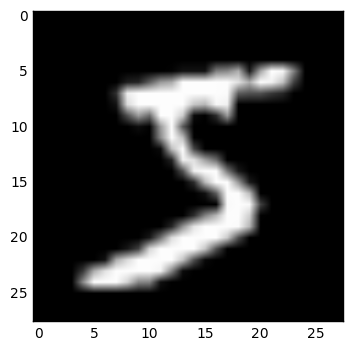

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='gray')#set gray scale

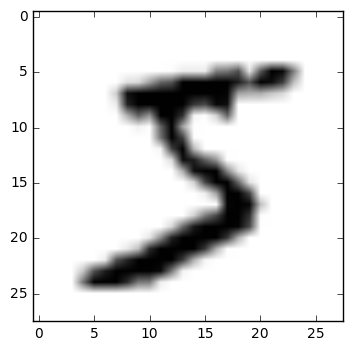

In [28]:
plt.imshow(X_train[0], cmap='gray_r')#set reverse gray scale

In [29]:
## pre-process input data for keras
#When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. 
#For example, a full-color image with all 3 RGB channels will have a depth of 3.
#MNIST images a depth of 1, but we must explicitly declare that.
#we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height)

In [30]:
#reshape train and test
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
print(X_train.shape)#check that it worked
print(X_test.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [33]:
#divide by max value to normalize
#find max
X_train.max()

255

In [34]:
#look at data type
X_train.dtype

dtype('uint8')

In [35]:
#Convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [36]:
#check it worked
X_train.max()

1.0

In [44]:
#need to have 10 different classes, one for each digit
#we don't
print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [43]:
#we can make it a categorical var using np_utils.to_categorical
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_train[:10])#check it

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [78]:
#create the model
model = Sequential()

In [80]:
#create input layer, input shape is the depth, hight, width of each digit image (3 bc not gray scale in dataset)
model.add(Convolution2D(32, 1, 1, activation='relu', border_mode='same', input_shape=(1,28,28)))

In [81]:
print(model.output_shape)

(None, 1, 28, 32)


In [83]:
#add another layer
model.add(Convolution2D(32, 1, 1, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))

In [84]:
#add fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #10 here corresponds to number of categorical vars

In [85]:
#compile the model, use OOB operator
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [86]:
#callbacks - https://keras.io/callbacks/
#keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

#fit the model - the cool part
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 24s - loss: 0.3717 - acc: 0.8850    
Epoch 2/10
60000/60000 [==============================] - 22s - loss: 0.1787 - acc: 0.9461    
Epoch 3/10
60000/60000 [==============================] - 21s - loss: 0.1498 - acc: 0.9546    
Epoch 4/10
60000/60000 [==============================] - 22s - loss: 0.1356 - acc: 0.9587    
Epoch 5/10
60000/60000 [==============================] - 22s - loss: 0.1246 - acc: 0.9615    
Epoch 6/10
60000/60000 [==============================] - 22s - loss: 0.1182 - acc: 0.9634    
Epoch 7/10
60000/60000 [==============================] - 23s - loss: 0.1127 - acc: 0.9657    
Epoch 8/10
60000/60000 [==============================] - 23s - loss: 0.1065 - acc: 0.9672    
Epoch 9/10
60000/60000 [==============================] - 23s - loss: 0.1026 - acc: 0.9693    
Epoch 10/10
60000/60000 [==============================] - 23s - loss: 0.0989 - acc: 0.9693    


In [90]:
#evaluate the model, metric was accuracy (defined when compiling the model)
score = model.evaluate(X_test, Y_test, verbose=0)

In [91]:
score

[0.069502386423764981, 0.98140000000000005]

In [93]:
#y_pred = model.predict(X_test)

In [95]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 98.14%


In [113]:
for n in range (0,10):
    print(y_pred[n].argmax())

7
2
1
0
4
1
4
9
6
9


In [114]:
for n in range (0,10):
    print(Y_test[n].argmax())

7
2
1
0
4
1
4
9
5
9


In [ ]:
#it got one wrong but still cool!